<a href="https://colab.research.google.com/github/Alan-B525/TP_FINAL_IC2022/blob/main/RNN_TP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Recurrentes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Preprocesado de datos

Funcion para preprocesamiento de los dataset

In [2]:
scaler = MinMaxScaler( feature_range=(0, 1) )

ve = 120


In [3]:

def preprocessing(data):
  data = data.drop(['Date','Adj Close'], axis=1)
  data = data.round(2)

  #transform dataframe to numpy array
  data = data.values

  #normalize data
  data = scaler.fit_transform(data)

  X_train = []
  y_train = []

  for i in range(ve, len(data)):
      X_train.append(data[i-ve:i, :])
      y_train.append(data[i, 0])
 
  X_train, y_train = np.array(X_train), np.array(y_train)
  


  return X_train, y_train

In [4]:
#importar datos
dataset_train = pd.read_csv('NASDAQ_train.csv')

#se llama la funcion de procesamiento
X_train, y_train = preprocessing(dataset_train)


# Construcción de la RNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Inicialización del la red

In [6]:
regressor = Sequential()

### Añadir las capas  LSTM y  regularización por Dropout

In [7]:
regressor.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=False))
regressor.add(Dropout(rate=0.2))

### Añadir la capa de salida

In [8]:
regressor.add(Dense(units=1))

### Compilar la RNN 

In [9]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Entrenamiento de la Red Neuronal Recurrente

In [10]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=False)

# Predecir el valor de las acciones

## Obtener el valor real de las acciones desde enero 22 a mayo 22


In [11]:

dataset_test = pd.read_csv('aapl_test.csv')

dataset_test


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.771174,746015200
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.888128,1181608400
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.840492,1289310400
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.779114,753048800
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.830720,673500800
...,...,...,...,...,...,...,...
994,2012-12-13,18.969643,19.201429,18.778570,18.917500,16.318443,625259600
995,2012-12-14,18.383928,18.504642,18.056429,18.206785,15.705369,1009579200
996,2012-12-17,18.176071,18.571428,17.901072,18.529642,15.983872,757607200
997,2012-12-18,18.750000,19.103571,18.580357,19.067858,16.448141,625685200


In [12]:
X_test, y_test = preprocessing(dataset_test)

real_stock_price = dataset_test.loc[ve:, ['Open']].values.round(2)

Realizamos la predicción.

In [13]:
# Prediccion de los valores del mes de enero 
predicted_stock_price = regressor.predict(X_test)


#Transformación de los precios

In [14]:
price_t = []

for i in range(len(predicted_stock_price)):
    x = (predicted_stock_price[i,0]*(scaler.data_max_[0]-scaler.data_min_[0]))+scaler.data_min_[0]
    price_t.append(x)


# Visualizar los resultados

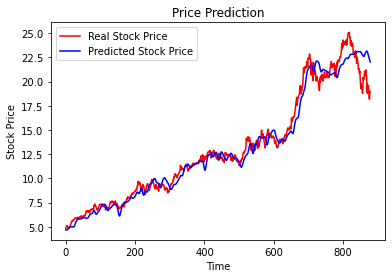

In [15]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(price_t, color = 'blue', label = 'Predicted Stock Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Error absoluto medio de la predicción.

In [17]:
mean_absolute_error(predicted_stock_price, real_stock_price)

12.609852833210134

Valos promedio de las acciones el mes de Enero.

In [18]:
np.mean(real_stock_price)

13.062798634812287

El porcentaje de error sobre el valor de las acciones.

In [19]:
mean_absolute_error(predicted_stock_price, real_stock_price) / np.mean(real_stock_price)

0.9653255160502088

Calcularmos el error de cada dia de enero y lo graficamos.

In [20]:
error = predicted_stock_price - real_stock_price

Text(0, 0.5, 'Prediction error')

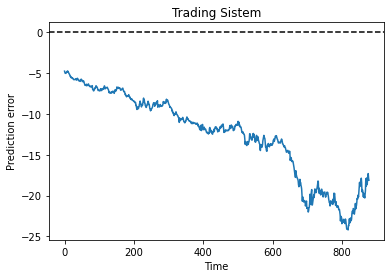

In [21]:
plt.plot(error)
plt.axhline(y=0, xmin=0, xmax=20, ls='--', color='k')
plt.title('Trading Sistem')
plt.xlabel('Time')
plt.ylabel('Prediction error')

In [22]:
import joblib
joblib.dump(regressor, 'modelo_entrenado.plk')

INFO:tensorflow:Assets written to: ram://0fc5c850-98cc-47d2-b432-a8d9d1fdd1c4/assets


INFO:tensorflow:Assets written to: ram://0fc5c850-98cc-47d2-b432-a8d9d1fdd1c4/assets


['modelo_entrenado.plk']

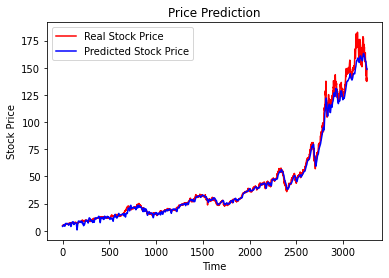

In [23]:
import joblib

modelo = joblib.load('modelo_entrenado.plk')

df = pd.read_csv('AAPL.csv')

X_df, y_df = preprocessing(df)

real = df.loc[ve:, ['Open']].values.round(2)

prediccion = modelo.predict(X_df)


prediccion_list = []

for i in range(len(prediccion)):
    x = (prediccion[i,0]*(scaler.data_max_[0]-scaler.data_min_[0]))+scaler.data_min_[0]
    prediccion_list.append(x)



plt.plot(real, color = 'red', label = 'Real Stock Price')
plt.plot(prediccion_list, color = 'blue', label = 'Predicted Stock Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()